In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler


In [84]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,11.0,2.0,36.0,1.0,1.0,1.0,2.0,0.0,3.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,11.0,1.0,54.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,11.0,1.0,51.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,11.0,2.0,24.0,4.0,1.0,1.0,2.0,0.0,4.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,11.0,1.0,65.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [85]:
# Aplicação da Transformação Robusta
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Se quiser visualizar os primeiros registros após a normalização
df.head()

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,-1.235294,0.0,-0.500000,-0.333333,0.0,0.0,1.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.235294,-1.0,0.192308,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.235294,-1.0,0.076923,-0.333333,0.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.235294,0.0,-0.961538,0.666667,0.0,0.0,1.0,0.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.235294,-1.0,0.615385,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


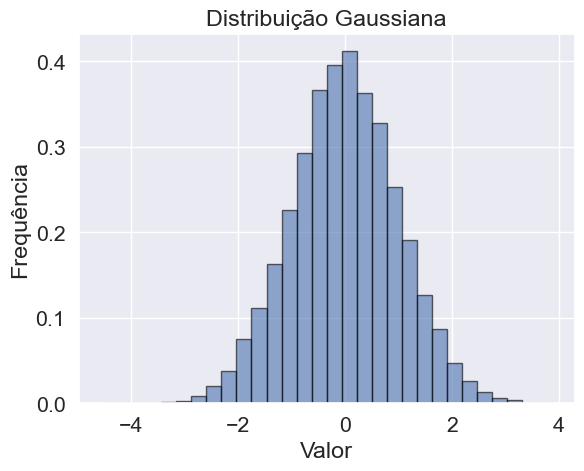

In [86]:
# Parâmetros da distribuição gaussiana
mu = 0  # Média
sigma = 1  # Desvio padrão
tamanho_amostra = len(df)  # Tamanho da amostra

# Gerar dados normalmente distribuídos
dados = np.random.normal(mu, sigma, tamanho_amostra)

# Traçar um histograma para visualizar a distribuição
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição Gaussiana')
plt.grid(True)
plt.show()

In [87]:
# from sklearn.preprocessing import RobustScaler
# # Criar um objeto RobustScaler
# scaler = RobustScaler()

# # Ajustar o scaler aos dados e transformá-los
# data_normalized = scaler.fit_transform(df)

# # Substituir os dados originais pelos dados normalizados
# df.iloc[:, :] = data_normalized

In [88]:
df

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,-1.235294,0.0,-0.500000,-0.333333,0.0,0.0,1.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,-1.235294,-1.0,0.192308,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,-1.235294,-1.0,0.076923,-0.333333,0.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,-1.235294,0.0,-0.961538,0.666667,0.0,0.0,1.0,0.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,-1.235294,-1.0,0.615385,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.235294,0.0,0.115385,-0.333333,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.5,1.0,1.0,1.0,1.216216,0.0,1.0
16772,1.235294,0.0,1.230769,-0.333333,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.0
16773,1.235294,-1.0,0.153846,0.333333,1.0,1.0,2.0,0.0,3.0,1.0,...,4.0,1.0,1.0,0.5,1.0,0.0,0.0,0.648649,0.0,1.0
16774,1.235294,0.0,0.230769,-0.333333,1.0,2.0,2.0,1.0,7.0,1.0,...,2.0,1.0,3.0,1.5,3.0,0.0,0.0,0.945946,1.0,1.0


In [90]:
# Todos os outliers da base
def Outlier(df):
   
   sns.boxplot(
      data = df,
      orient =  "h",
      showcaps = False,
      notch = True,
      flierprops = {"marker": "."},
      boxprops = {
         "facecolor": (.4, .6, .8, .5)
      },
      medianprops = {
         "color": "coral"
      }
   )

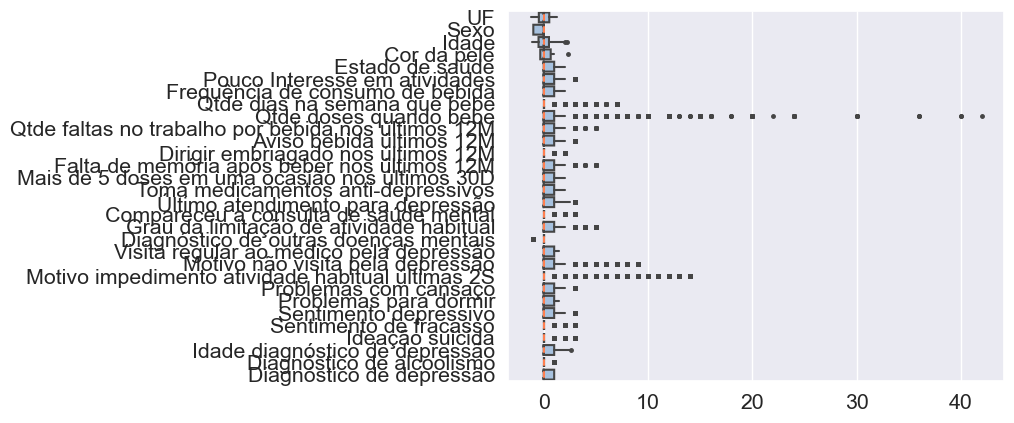

In [91]:
Outlier(df)

In [92]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [93]:
# array = df.values
# array
# X = array[:,0:len(df.columns)-1]
# Y = array[:,len(df.columns)-1]

X = df.drop("Diagnóstico de depressão", axis=1)
Y = df["Diagnóstico de depressão"]


print("X:", len(X), "Y:", len(Y))


X: 16776 Y: 16776


In [96]:
test_size = 0.4 # Tamanho do conjunto de teste
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Defina o modelo que você deseja avaliar
modelo = RandomForestClassifier()

# Defina o número de folds
num_folds = 5  # Você pode ajustar esse valor conforme necessário

# Defina a métrica que deseja avaliar (por exemplo, precisão)
metrica = make_scorer(precision_score)

# Crie um objeto de validação cruzada k-fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Realize a validação cruzada e obtenha as métricas de desempenho
scores = cross_val_score(modelo, X, Y, cv=kf, scoring=metrica)

# Calcule a média das métricas
media_desempenho = scores.mean()
desvio_padrao = scores.std()

print(f'Média da Precisão: {media_desempenho}')
print(f'Desvio Padrão da Precisão: {desvio_padrao}')


Média da Precisão: 1.0
Desvio Padrão da Precisão: 0.0


Text(0.5, 1.0, 'Matriz de Confusão')

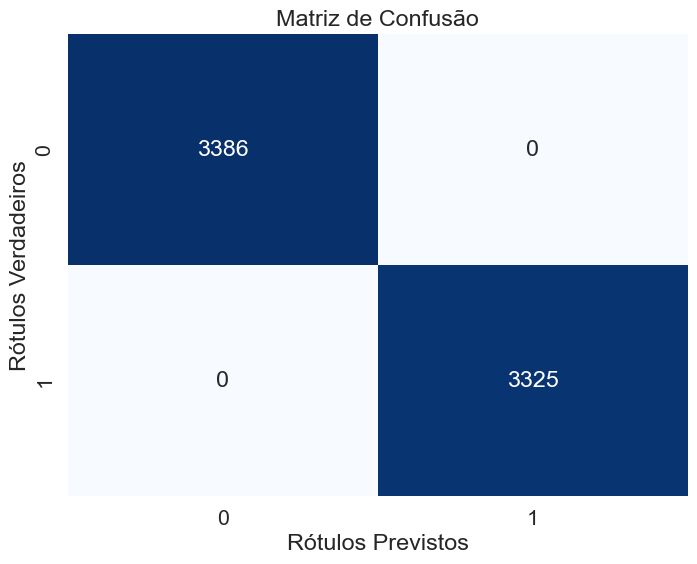

In [98]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
# Calcule a matriz de confusão
cm = confusion_matrix(Y_test, predictions)

# Crie uma figura e um eixo para o plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajusta o tamanho da fonte

# Use o seaborn para criar um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configuração de rótulos e títulos
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

In [99]:
report = classification_report(Y_test, predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.0,1.0,1.0,3386.0
1.0,1.0,1.0,1.0,3325.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,6711.0
weighted avg,1.0,1.0,1.0,6711.0


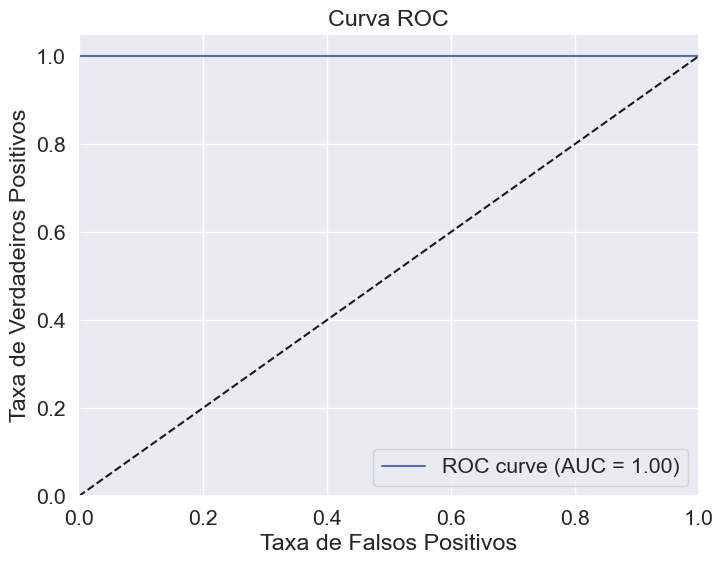

In [100]:
probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(Y_test, probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

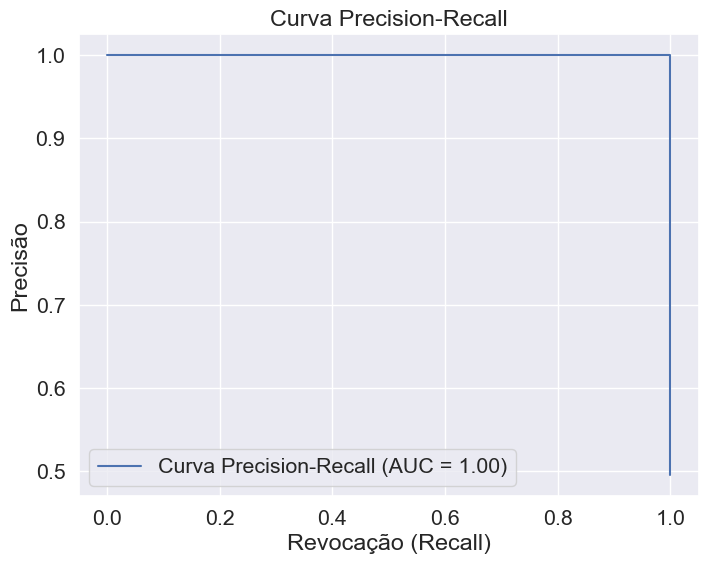

In [101]:
precision, recall, thresholds = precision_recall_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
plt.xlabel('Revocação (Recall)')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()

In [102]:
report = classification_report(Y_test, predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
0.0,1.0,1.0,1.0,3386.0
1.0,1.0,1.0,1.0,3325.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,6711.0
weighted avg,1.0,1.0,1.0,6711.0


In [104]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import numpy as np

# Criando o modelo da RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(len(X_train.columns), 1))) 

model.add(Dense(1, activation='sigmoid'))  #Camada de saída para classificação binária


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Formatando os dados em sequência para ajustar as entradas
X_train_rnn = np.expand_dims(X_train.values, axis=2)  # Adicionando uma dimensão para tratar os dados como sequências

a = model.fit(X_train_rnn, Y_train, epochs=20, batch_size=10)  # Ajustando o número de épocas e tamanho do lote

Epoch 1/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0985 - accuracy: 0.9735
Epoch 2/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0119 - accuracy: 0.9976
Epoch 3/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0427 - accuracy: 0.9912
Epoch 4/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0148 - accuracy: 0.9962
Epoch 5/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0203 - accuracy: 0.9969
Epoch 6/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.9975
Epoch 7/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0046 - accuracy: 0.9989
Epoch 8/20
1007/1007 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 9/20
1007/1007 [==============================] - 2s 2ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 10/20
1007/1007 [==============================] - 2s 2ms/step - loss: 0.005

In [105]:
# Avalie o modelo e faça previsões
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

210/210 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9987
Test Loss: 0.0034683707635849714
Test Accuracy: 0.9986588954925537


In [106]:
# precision, recall, thresholds = precision_recall_curve(Y_test, probs)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
# plt.xlabel('Revocação (Recall)')
# plt.ylabel('Precisão')
# plt.title('Curva Precision-Recall')
# plt.legend(loc="lower left")
# plt.show()

In [107]:
# rf = RandomForestRegressor()

# rf.fit(X_train, Y_train)
# predict = rf.predict(X_test)
# explained_variance = metrics.explained_variance_score(Y_test, predict)
# mean_absolute_error = metrics.mean_absolute_error(Y_test, predict) 
# mse = metrics.mean_squared_error(Y_test, predict) 
# mean_squared_log_error = metrics.mean_squared_log_error(Y_test, predict)
# median_absolute_error = metrics.median_absolute_error(Y_test, predict)
# r2 = metrics.r2_score(Y_test, predict)

# # Mostrando o resultado de desempenho do modelo
# print('Ex.V: ', explained_variance)
# print('MSLE: ', mean_squared_log_error)
# print('R2  : ', r2)
# print('MAE : ', mean_absolute_error)
# print('MSE : ', mse)
# print('RMSE: ', np.sqrt(mse))


In [108]:
# # Suponha que Y_test contenha os valores reais e predict contenha os valores previstos.

# plt.figure(figsize=(8, 6))

# # Plotagem dos valores reais com marcador 'o' (círculos)
# plt.scatter(Y_test, Y_test, alpha=0.5, label='Valores Reais', marker='o')

# # Plotagem dos valores previstos com marcador 'x' (cruz)
# plt.scatter(Y_test, predict, alpha=0.5, label='Valores Previstos', marker='x')

# plt.xlabel('Valores Reais')
# plt.ylabel('Valores Previstos')
# plt.title('Gráfico de Dispersão de Valores Reais vs. Valores Previstos')
# plt.legend()  # Adiciona uma legenda ao gráfico

# plt.show()

In [109]:
# # Histograma de Resíduos
# residuals = Y_test - predict
# residuals = np.ravel(residuals)
# plt.figure(figsize=(8, 6))
# plt.hist(residuals, bins=30)
# plt.xlabel('Resíduos')
# plt.ylabel('Frequência')
# plt.title('Histograma de Resíduos')
# plt.show()


In [110]:
# # Gráfico de Probabilidade Normal dos Resíduos
# from scipy import stats
# plt.figure(figsize=(8, 6))
# stats.probplot(residuals, plot=plt)
# plt.title('Gráfico de Probabilidade Normal dos Resíduos')
# plt.show()

In [111]:
# # Calcular os resíduos
# plt.figure(figsize=(8, 6))
# plt.scatter(predict, residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--')  # Linha de referência dos resíduos igual a zero
# plt.xlabel('Valores Previstos')
# plt.ylabel('Resíduos')
# plt.title('Gráfico de Resíduos vs. Valores Previstos')
# plt.show()

In [112]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, Y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

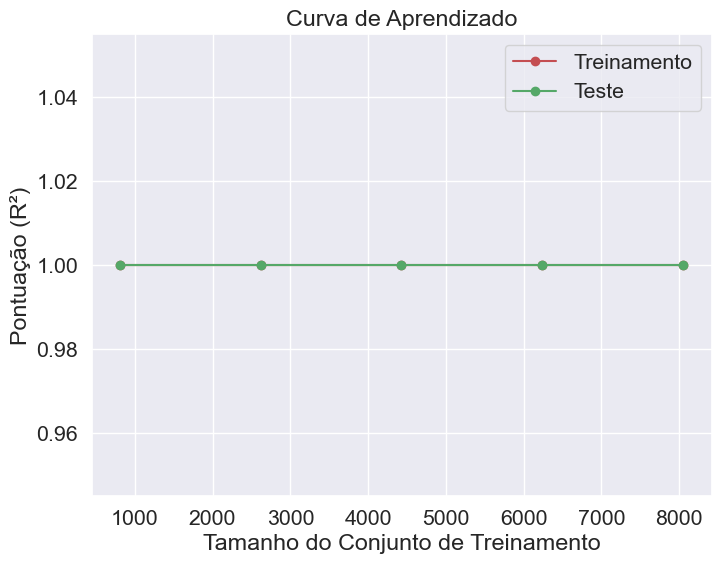

In [113]:
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Teste")
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação (R²)')
plt.legend(loc="best")
plt.title('Curva de Aprendizado')
plt.show()